<a href="https://colab.research.google.com/github/pydevcasts/MLHub/blob/master/jenic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# تنظیم تعداد روزها و نقاط داده ساعتی
days = 468
hours_per_day = 24
total_hours = days * hours_per_day



# بررسی طول آرایه‌ها
date_rng = pd.date_range(start='2021-01-01', end='2022-04-13', freq='h')
power_consumption = np.random.uniform(10, 300, len(date_rng))
temperature = np.random.uniform(5, 35, len(date_rng))
humidity = np.random.uniform(30, 90, len(date_rng))

# بررسی طول‌ها
print(f"تعداد زمان‌ها: {len(date_rng)}")
print(f"تعداد مصرف برق: {len(power_consumption)}")
print(f"تعداد دما: {len(temperature)}")
print(f"تعداد رطوبت: {len(humidity)}")

# ساخت دیتافریم
data = pd.DataFrame({
    'DateTime': date_rng,
    'PowerConsumption': power_consumption,
    'Temperature': temperature,
    'Humidity': humidity,
})


# ذخیره داده‌ها در یک فایل CSV
data.to_csv('consumption_simulated.csv', index=False)

print("دیتاست شبیه‌سازی‌شده ایجاد و ذخیره شد.")


تعداد زمان‌ها: 11209
تعداد مصرف برق: 11209
تعداد دما: 11209
تعداد رطوبت: 11209
دیتاست شبیه‌سازی‌شده ایجاد و ذخیره شد.


# Jenic-ANN

Generation 1/5
Generation 2/5
Generation 3/5
Generation 4/5
Generation 5/5
Best Parameters: {'units': 20, 'activation': 'relu', 'dropout': 0.1, 'learning_rate': 0.01, 'batch_size': 16}
Epoch 1/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.1352
Epoch 2/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0904
Epoch 3/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0881
Epoch 4/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0868
Epoch 5/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0870
Epoch 6/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0853
Epoch 7/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0847
Epoch 8/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0851
Epoch 9/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0846
Epoch 10/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0837
Epoch 11/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0843
Epoch 12/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0849
Epoch 

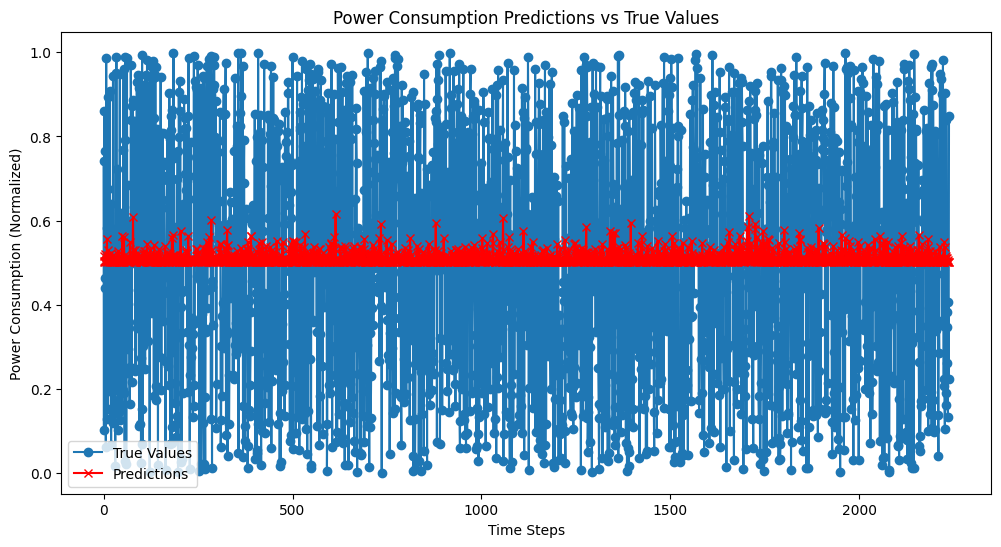

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
# --- مرحله 1: آماده‌سازی داده‌ها ---
# خواندن دیتاست شبیه‌سازی‌شده
data = pd.read_csv('consumption_simulated.csv')

# نرمال‌سازی داده‌ها
scaler = MinMaxScaler()
data[['PowerConsumption', 'Temperature', 'Humidity']] = scaler.fit_transform(data[['PowerConsumption', 'Temperature', 'Humidity']])

# تبدیل داده‌ها به سری زمانی
window_size = 20
X, y = [], []
for i in range(len(data) - window_size):
    X.append(data.iloc[i:i+window_size][['PowerConsumption', 'Temperature', 'Humidity']].values)
    y.append(data.iloc[i+window_size]['PowerConsumption'])

X, y = np.array(X), np.array(y)

# تقسیم داده‌ها به بخش آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- مرحله 2: تعریف مدل ---

def create_model(params):
    model = Sequential()
    # استفاده از لایه Input برای تعریف شکل ورودی
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(int(params['units']), activation=params['activation'], return_sequences=True))
    model.add(Dropout(params['dropout']))
    model.add(LSTM(int(params['units'] // 2), activation=params['activation']))
    model.add(Dropout(params['dropout']))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# --- مرحله 3: الگوریتم ژنتیک ---
def genetic_algorithm(population_size, generations):
    # تعریف مقادیر ابرپارامترها
    param_space = {
        'units': [20, 50],
        'activation': ['relu', 'tanh'],
        'dropout': [0.1, 0.3],
        'learning_rate': [0.001, 0.01],
        'batch_size': [16, 64]
    }

    # تولید جمعیت اولیه
    population = []
    for _ in range(population_size):
        individual = {key: np.random.choice(value) if isinstance(value, list) else np.random.uniform(value[0], value[1])
                      for key, value in param_space.items()}
        population.append(individual)

    # اجرای الگوریتم ژنتیک
    for generation in range(generations):
        print(f"Generation {generation+1}/{generations}")
        fitness = []
        for individual in population:
            model = create_model(individual)
            model.fit(X_train, y_train, epochs=5, batch_size=int(individual['batch_size']), verbose=0)
            mse = model.evaluate(X_test, y_test, verbose=0)
            fitness.append((mse, individual))

        # مرتب‌سازی براساس Fitness
        fitness.sort(key=lambda x: x[0])
        population = [ind for _, ind in fitness[:population_size//2]]  # انتخاب برترین‌ها

        # تولید نسل جدید
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = np.random.choice(population, 2, replace=False)
            child = {key: np.random.choice([parent1[key], parent2[key]]) for key in param_space.keys()}
            if np.random.rand() < 0.1:  # احتمال جهش
                random_key = np.random.choice(list(param_space.keys()))
                child[random_key] = np.random.choice(param_space[random_key])
            new_population.append(child)
        population.extend(new_population)

    # بهترین فرد
    best_model = fitness[0][1]
    print("Best Parameters:", best_model)
    return best_model

# اجرای الگوریتم ژنتیک
best_params = genetic_algorithm(population_size=10, generations=5)

# --- مرحله 4: آموزش مدل نهایی ---
final_model = create_model(best_params)
final_model.fit(X_train, y_train, epochs=50, batch_size=int(best_params['batch_size']), verbose=1)
final_mse = final_model.evaluate(X_test, y_test)
print("Final MSE:", final_mse)
# Model predictions
predictions = final_model.predict(X_test)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Values', marker='o')
plt.plot(predictions, label='Predictions', color='red', marker='x')
plt.title('Power Consumption Predictions vs True Values')
plt.xlabel('Time Steps')
plt.ylabel('Power Consumption (Normalized)')
plt.legend()
plt.show()

# ANN

Epoch 1/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.1207
Epoch 2/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0891
Epoch 3/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0890
Epoch 4/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0882
Epoch 5/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0866
Epoch 6/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0862
Epoch 7/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0859
Epoch 8/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0867
Epoch 9/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0843
Epoch 10/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0843
Epoch 11/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0842
Epoch 12/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0847
Epoch 13/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0834
Epoch 14/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0844
Epoch 15/50
280/280 ━━━━━━━━━━━━━━━━━━━

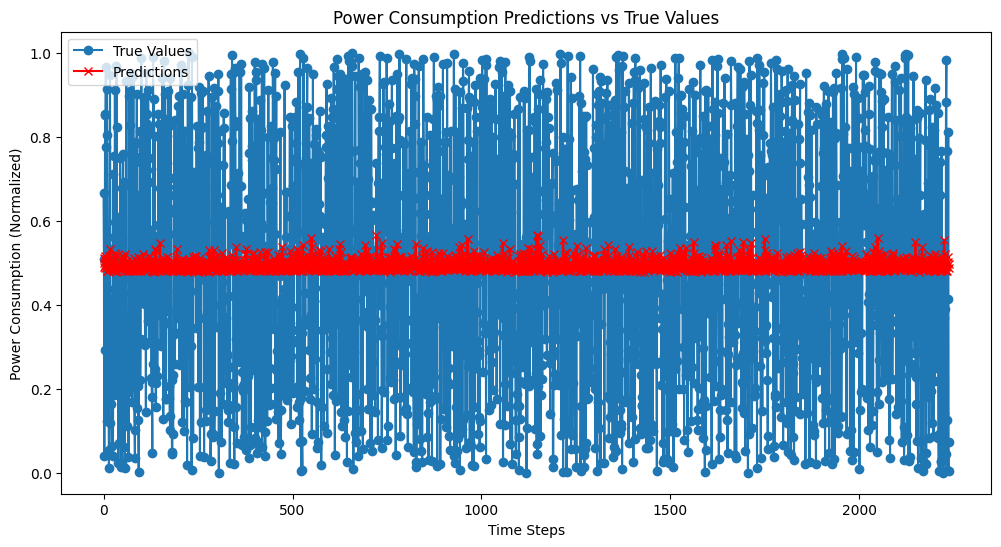

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

# --- مرحله 1: آماده‌سازی داده‌ها ---
# خواندن دیتاست شبیه‌سازی‌شده
data = pd.read_csv('consumption_simulated.csv')

# نرمال‌سازی داده‌ها
scaler = MinMaxScaler()
data[['PowerConsumption', 'Temperature', 'Humidity']] = scaler.fit_transform(data[['PowerConsumption', 'Temperature', 'Humidity']])

# تبدیل داده‌ها به سری زمانی
window_size = 20
X, y = [], []
for i in range(len(data) - window_size):
    X.append(data.iloc[i:i+window_size][['PowerConsumption', 'Temperature', 'Humidity']].values)
    y.append(data.iloc[i+window_size]['PowerConsumption'])

X, y = np.array(X), np.array(y)

# تقسیم داده‌ها به بخش آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- مرحله 2: تعریف مدل ---
def create_model():
    model = Sequential()
    # استفاده از لایه Input برای تعریف شکل ورودی
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(50, activation='relu', return_sequences=True))  # تعداد واحدها و نوع فعال‌سازی ثابت
    model.add(Dropout(0.2))  # نرخ افت ثابت
    model.add(LSTM(25, activation='relu'))  # تعداد واحدها و نوع فعال‌سازی ثابت
    model.add(Dropout(0.2))  # نرخ افت ثابت
    model.add(Dense(1))  # لایه خروجی
    model.compile(optimizer='adam', loss='mse')  # کامپایل مدل
    return model

# --- مرحله 3: آموزش مدل نهایی ---
final_model = create_model()
final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)  # آموزش مدل با پارامترهای ثابت
final_mse = final_model.evaluate(X_test, y_test)  # ارزیابی مدل
print("Final MSE:", final_mse)

# پیش‌بینی‌های مدل
predictions = final_model.predict(X_test)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Values', marker='o')
plt.plot(predictions, label='Predictions', color='red', marker='x')
plt.title('Power Consumption Predictions vs True Values')
plt.xlabel('Time Steps')
plt.ylabel('Power Consumption (Normalized)')
plt.legend()
plt.show()